In [43]:
from imports import *
from dataloader.loader import Pre_processing
from processor.processor import Preprocessor
from model.model import ML
from executor.executir import HouseObjectOriented
import seaborn as sns

In [2]:
#collect the data
df = pd.read_csv("C:/Users/PEARL/Downloads/Nitin/mydf.csv",)

In [3]:
index = pd.Index(range(df.shape[0]))
data = df.set_index(index)
data = data.reset_index()
data.rename(columns={'index':'Id'},inplace=True)

In [6]:
data['year_of_sale'] = pd.DatetimeIndex(data['date']).year

In [7]:
data

,Id,borough,neighborhood,bldclasscat,taxclasscurr,block,lot,bldclasscurr,address,aptnum,...,comunits,totunits,landsqft,grosssqft,yrbuilt,taxclasssale,bldclasssale,price,date,year_of_sale
0,0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,11.0,A5,71 BAY 10TH STREET,,...,NaN,1,2900,1660,1930,1,A5,829000,NaN,NaN
1,1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6364,72.0,A5,68 BAY 14TH STREET,,...,NaN,1,1950,972,1950,1,A5,790000,2016-06-21,2016.0
2,2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,79.0,A5,8668 19TH AVENUE,,...,NaN,1,2223,2520,1930,1,A5,788000,2016-03-31,2016.0
3,3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6394,5.0,A5,160 BAY 10TH STREET,,...,NaN,1,2469,1836,1940,1,A5,920000,NaN,NaN
4,4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6401,18.0,A5,8739 BAY 16TH STREET,,...,NaN,1,2417,1462,1925,1,A5,839000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19635,19635,3,DOWNTOWN-FULTON MALL,11 SPECIAL CONDO BILLING LOTS,2,165,1103.0,RR,"210 LIVINGSTON ST, AFF",AFF,...,0.0,1,25112,51528,2016,2,RR,0,2020-12-22,2020.0
19636,19636,3,WILLIAMSBURG-NORTH,11 SPECIAL CONDO BILLING LOTS,2,2331,1144.0,RR,"308 NORTH 7TH STREET, PHB",PHB,...,0.0,1,13800,1271,2017,2,RR,2353500,2020-07-14,2020.0
19637,19637,3,WILLIAMSBURG-NORTH,11 SPECIAL CONDO BILLING LOTS,2,2337,1201.0,RR,"207 NORTH 5TH STREET, A",A,...,0.0,1,2500,1716,2017,2,RR,3360000,NaN,NaN
19638,19638,3,WILLIAMSBURG-NORTH,11 SPECIAL CONDO BILLING LOTS,2,2337,1202.0,RR,"207 NORTH 5TH STREET, B",B,...,0.0,1,2500,1303,2017,2,RR,3360000,NaN,NaN


# Data Analysis

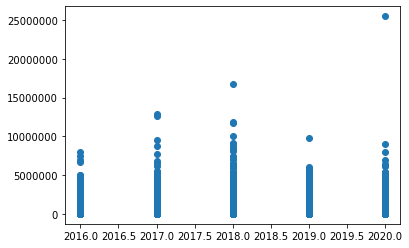

In [9]:
plt.scatter(x=data['year_of_sale'],y=data['price'])
ax =plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.draw()


## In the above scatter plot we can clearly see that highest sales was of $255 million in 2020, it would be good to find the reason behind this outlier value

In [10]:
data.sort_values('price').tail(1)

,Id,borough,neighborhood,bldclasscat,taxclasscurr,block,lot,bldclasscurr,address,aptnum,...,comunits,totunits,landsqft,grosssqft,yrbuilt,taxclasssale,bldclasssale,price,date,year_of_sale
12656,12656,3,BROOKLYN HEIGHTS,01 ONE FAMILY DWELLINGS,1,208,NaN,A7,8 MONTAGUE TERRACE,7,...,0.0,1,4140,11580,1900,1,A7,25500000,2020-12-24,2020.0


In [11]:
data['price'].describe().apply(lambda x: format(x, 'f'))

count       19640.000000
mean       663296.623014
std        854682.009544
min             0.000000
25%             0.000000
50%        545000.000000
75%        890000.000000
max      25500000.000000
Name: price, dtype: object

## Further checking the statistics on Price, interestingly the 25th percentile house sales correspond to $0, unsure about it though, if this is not an affecting reason then we should go ahead and remove the zero Price values

In [12]:
data_non_zero = data[data.price > 0]

In [16]:
print("Original shape of data", data.shape)
print("Shape of data after removing 0 value prices", data_non_zero.shape)

Original shape of data (19640, 22)
Shape of data after removing 0 value prices (13985, 22)


In [18]:
bins=[-100000000,20000,40000,60000,80000,100000,1000000,10000000,500000000]
choices =['$0-$200k','$200k-$400k','$400k-$600k','$600k-$800k','$800k-$1mlln','$1mlln-$10mlln','$10mlln-$100mlln','$100mlln-$500mlln']
data_non_zero['price_range']=pd.cut(data_non_zero['price'],bins=bins,labels=choices)

In [34]:
sale_range = data_non_zero.groupby(['year_of_sale','price_range'])['price_range'].count().reset_index(name='count')

C:\Users\PEARL\anaconda3\lib\site-packages\seaborn\distributions.py:385: UserWarning:

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.



Text(0.5, 1.0, 'test')

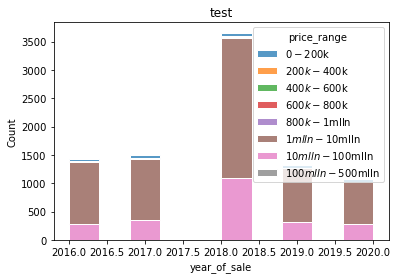

In [51]:
ax = sns.histplot(
    sale_range,
    x = 'year_of_sale',
    weights='count',
    hue='price_range',
    multiple='stack',
    edgecolor='white',
    shrink=1
)

ax.set_title('test')

## Here we can see that in all the years most sales occurred between the range $1 million - $10 million and the second most sales occurred in the range of $10 million - $100 million

In [ ]:
data.columns

In [ ]:
X  = data.drop("price",axis=1)
y = data["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

In [ ]:
#create HouseObjectOriented object
HOOP = HouseObjectOriented()

In [ ]:
HOOP.add_data(X_train, X_test)


In [ ]:
HOOP.information()

In [ ]:
# dft.reset_index().drop('index', axis=1)

In [ ]:
ML1 = HOOP.ml(HOOP)

In [ ]:
ML1.show_available_algorithms()


In [ ]:
ML1.init_regressors('all')